In [2]:
import pandas as pd
import yfinance as yf

# Define the stock symbol and date range
stock_symbol = "AAPL"
start_date = "2022-11-04"
end_date = "2023-12-18"

# Use yfinance to retrieve stock stock_data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
# Print the stock_data
print(stock_data)
# Tính min, max, median, variance, và standard deviation cho các cột
statistics = stock_data[['Open', 'Close', 'High', 'Low', 'Adj Close','Volume']].agg([min, max, 'median', 'var', 'std'])

# Làm tròn kết quả với 2 chữ số thập phân
statistics = statistics.round(2)

print(statistics)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-11-04  142.089996  142.669998  134.380005  138.380005  137.610840   
2022-11-07  137.110001  139.149994  135.669998  138.919998  138.147812   
2022-11-08  140.410004  141.429993  137.490005  139.500000  138.724594   
2022-11-09  138.500000  138.550003  134.589996  134.869995  134.120331   
2022-11-10  141.240005  146.869995  139.500000  146.869995  146.053619   
...                ...         ...         ...         ...         ...   
2023-12-11  193.110001  193.490005  191.419998  193.179993  193.179993   
2023-12-12  193.080002  194.720001  191.720001  194.710007  194.710007   
2023-12-13  195.089996  198.000000  194.850006  197.960007  197.960007   
2023-12-14  198.020004  199.619995  196.160004  198.110001  198.110001   
2023-12-15  197.529999  198.399994  197.000

C:\Users\phamt\AppData\Local\Temp\ipykernel_13936\974851494.py:14: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  statistics = stock_data[['Open', 'Close', 'High', 'Low', 'Adj Close','Volume']].agg([min, max, 'median', 'var', 'std'])
C:\Users\phamt\AppData\Local\Temp\ipykernel_13936\974851494.py:14: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  statistics = stock_data[['Open', 'Close', 'High', 'Low', 'Adj Close','Volume']].agg([min, max, 'median', 'var', 'std'])
C:\Users\phamt\AppData\Local\Temp\ipykernel_13936\974851494.py:14: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future ver

               Open     Close      High       Low  Adj Close    Volume
Open       1.000000  0.994694  0.997793  0.997828   0.994718 -0.407486
Close      0.994694  1.000000  0.997815  0.998036   0.999961 -0.408053
High       0.997793  0.997815  1.000000  0.997986   0.997790 -0.388209
Low        0.997828  0.998036  0.997986  1.000000   0.998018 -0.424315
Adj Close  0.994718  0.999961  0.997790  0.998018   1.000000 -0.408407
Volume    -0.407486 -0.408053 -0.388209 -0.424315  -0.408407  1.000000


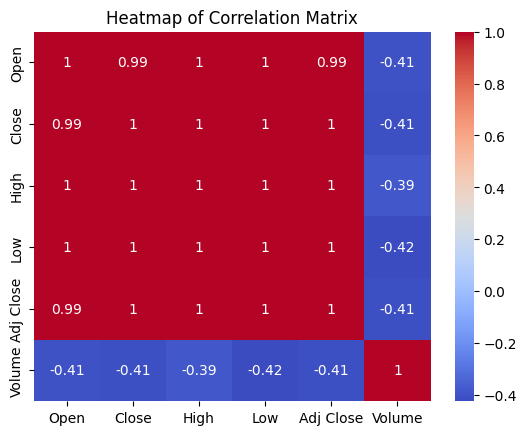

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Tính độ tương quan giữa các cột
correlation_matrix = stock_data[['Open', 'Close', 'High', 'Low', 'Adj Close','Volume']].corr()
print(correlation_matrix)

# Trực quan hóa đồ thị bằng heat map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()


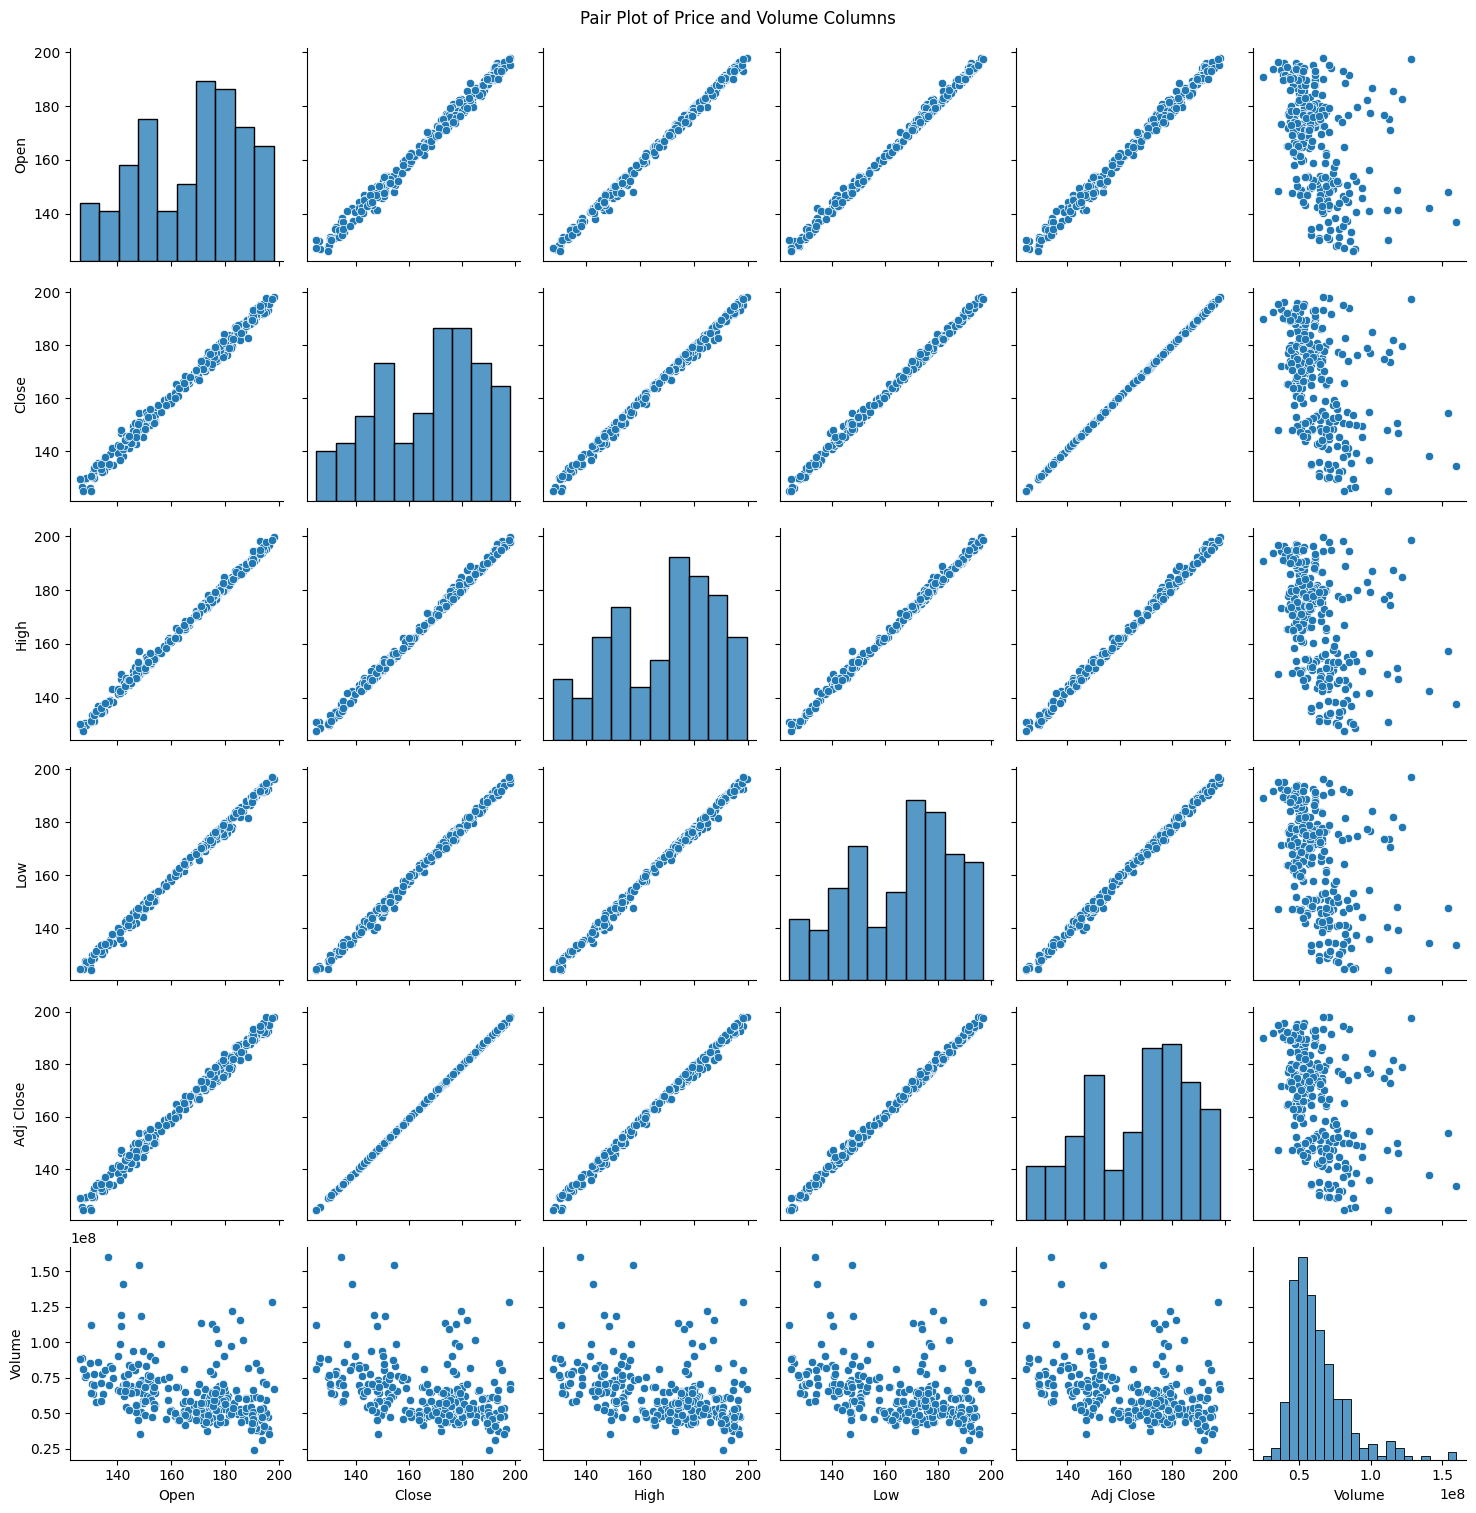

In [4]:
# Trực quan hóa bằng pair plot
sns.pairplot(stock_data[['Open', 'Close', 'High', 'Low', 'Adj Close','Volume']])
plt.suptitle("Pair Plot of Price and Volume Columns", y= 1.01)
plt.show()

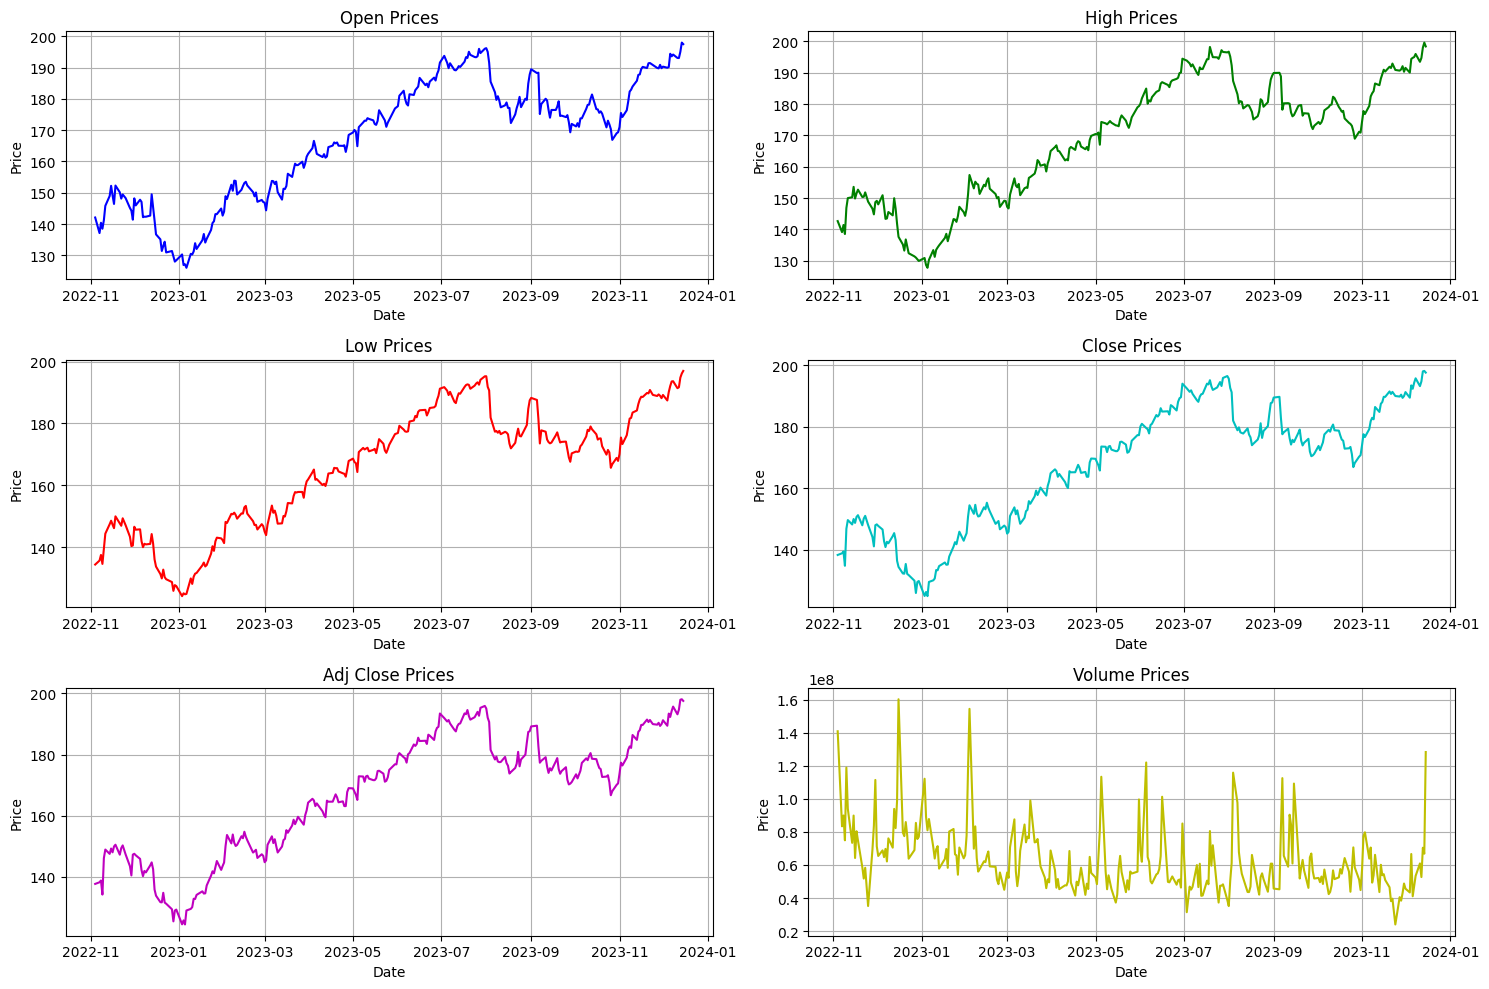

In [5]:
import matplotlib.pyplot as plt

# Create subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
colors = ['b', 'g', 'r', 'c', 'm', 'y']

for i, ax in enumerate(axes.flat):
    column = columns[i]
    color = colors[i]

    ax.plot(stock_data[column], color=color)
    ax.set_title(f'{column} Prices')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.grid(True)

plt.tight_layout()

plt.show()


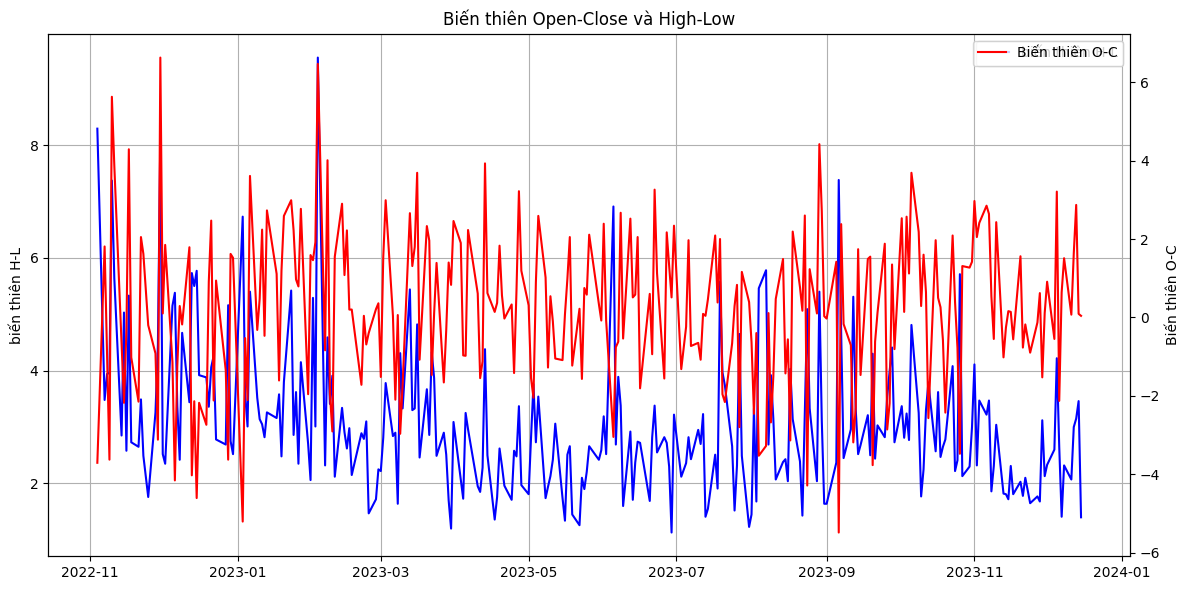

In [6]:
# Tính sự khác biệt giữa giá cao và giá thấp
delta_1 = stock_data['High'] - stock_data['Low']

# Tính sự biến thiên giữa giá open và close
delta_2 = stock_data['Close'] - stock_data['Open']

# Tạo figure 
fig, ax1 = plt.subplots(figsize=(12, 6))

# Biểu đồ cho delta_1
plt.plot(delta_1, label='biến thiên H-L', color='blue')
plt.title('Biến thiên Open-Close và High-Low')
plt.ylabel('biến thiên H-L')
plt.legend(loc ='upper right')
plt.grid(True)

ax2 = ax1.twinx()

# Biểu đồ cho delta_2
plt.plot(delta_2, label='Biến thiên O-C', color='red')
plt.ylabel('Biến thiên O-C')
plt.legend(loc ='upper left')
plt.legend()

plt.tight_layout()
plt.show()


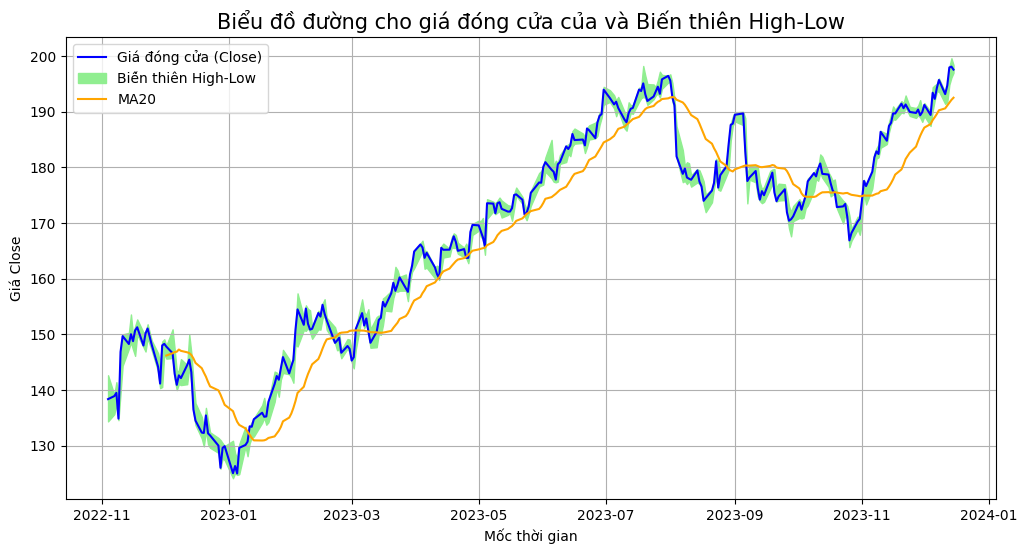

In [7]:

# Tạo biểu đồ đường
plt.figure(figsize=(12, 6))

# Biến đổi dữ liệu để sử dụng ngày làm index
stock_data['Date'] = stock_data.index

# Vẽ biểu đồ đường cho giá đóng cửa
sns.lineplot(x=stock_data['Date'], y=stock_data['Close'], label='Giá đóng cửa (Close)', color='blue')

# Vẽ đường biến thiên giá high-low
plt.fill_between(stock_data['Date'], stock_data['Low'], stock_data['High'], color='lightgreen', label='Biến thiên High-Low')

# Tính toán MA20 (Moving Average 20) _ rolling() của pandas: tính trung bình cộng của giá đóng cửa trong 20 ngày
ma20 = stock_data['Close'].rolling(window=20).mean()
plt.plot(stock_data['Date'], ma20, label='MA20', color='orange')

# Đặt tiêu đề và chú thích
plt.title('Biểu đồ đường cho giá đóng cửa của và Biến thiên High-Low', fontsize=15)
plt.xlabel('Mốc thời gian')
plt.ylabel('Giá Close')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()



R-squared: 0.9981280389439994
Mean Absolute Error: 0.6908540074121419


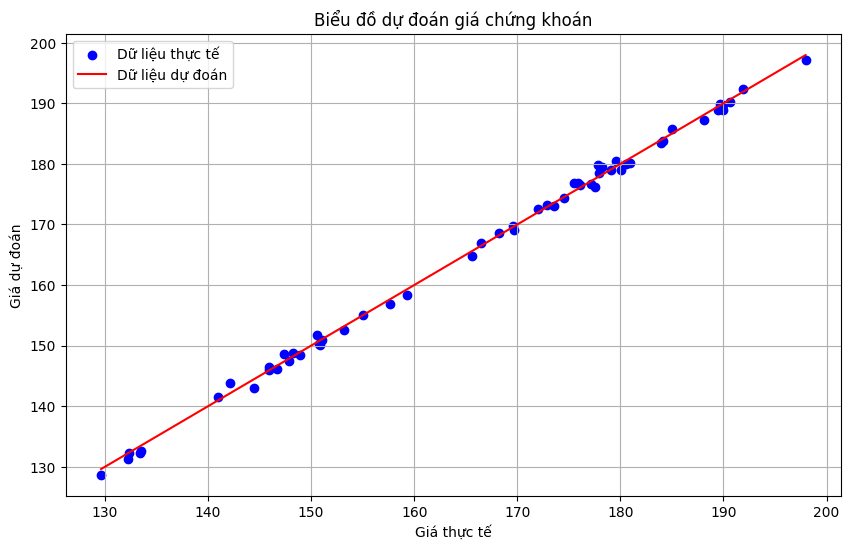

In [8]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Chuyển đổi cột 'Date' thành các đặc trưng mới
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day

# Cập nhật các đặc trưng X
X = stock_data[['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']]


# Xác định các yếu tố độc lập (X) và biến mục tiêu (y)
X = stock_data[['Open', 'High', 'Low','Volume']]
y = stock_data['Close']
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Tiến hành dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

# Vẽ đồ thị dự đoán và thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Dữ liệu thực tế', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', label='Dữ liệu dự đoán', color='red')
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.legend(loc='upper left')
plt.grid(True)
plt.title('Biểu đồ dự đoán giá chứng khoán')
plt.show()

In [9]:
import pandas as pd

# Nhập thời điểm mua cổ phiếu từ người dùng
buy_time_str = input("Nhập thời điểm mua cổ phiếu (yyyy-mm-dd): ")

# Chuyển đổi thời điểm mua thành timestamp
buy_time = pd.to_datetime(buy_time_str).timestamp()

# Dự đoán giá mở cửa tại thời điểm mua
predicted_open_at_buy_time = model.predict([[buy_time]])

# Nhập số ngày muốn dự đoán sau khi mua cổ phiếu
days_after_purchase = int(input("Nhập số ngày sau khi mua cổ phiếu bạn muốn dự đoán: "))

# Tính thời điểm dự đoán sau khoảng thời gian
predicted_time_after_purchase = buy_time + days_after_purchase * 24 * 60 * 60

# Dự đoán giá mở cửa tại thời điểm sau khoảng thời gian
predicted_open_after_purchase = model.predict([[predicted_time_after_purchase]])

# Tính lời/lỗ cụ thể
profit_or_loss = predicted_open_after_purchase - predicted_open_at_buy_time

print(f"Giá mở cửa tại thời điểm mua: {predicted_open_at_buy_time[0]}")
print(f"Giá mở cửa dự đoán sau {days_after_purchase} ngày: {predicted_open_after_purchase[0]}")

if profit_or_loss > 0:
    print(f"Bạn có lãi: {profit_or_loss[0]}")
elif profit_or_loss < 0:
    print(f"Bạn có lỗ: {profit_or_loss[0]}")
else:
    print("Bạn giữ nguyên giá trị của cổ phiếu.")


DateParseError: month must be in 1..12: 2024-15-20, at position 0